In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from cmocean import cm

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4,4]
mpl.rcParams['figure.dpi'] = 350
mpl.rcParams['savefig.dpi'] = 350

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [2]:
def reg_mean_3D(var, tarea, mask, region_num):
    var = np.ma.masked_invalid(var)

    ave = np.zeros([var.shape[0], var.shape[1]])
    
    for t in np.arange(var.shape[0]):
        for d in np.arange(var.shape[1]):
            temp = np.ma.masked_where(~(mask==region_num),var[t,d,:,:])
            temp_tarea = np.ma.masked_where(~(mask==region_num), tarea)
            ave[t,d] = np.ma.average(temp, weights = temp_tarea)
    return ave
def reg_mean_2D(var, tarea, mask, region_num):
    var = np.ma.masked_invalid(var)
    
    ave = np.zeros(var.shape[0])
    
    for t in np.arange(var.shape[0]):
        temp = np.ma.masked_where(~(mask==region_num),var[t,:,:])
        temp_tarea = np.ma.masked_where(~(mask==region_num), tarea)
        ave[t] = np.ma.average(temp, weights = temp_tarea)
    return ave

In [3]:
dates_UR = pd.date_range(start = '01/31/2020', end = '12/31/2050', freq='M')
dates_c = pd.date_range(start = '01/31/2016', end = '6/30/2050', freq='M')
war_date  = pd.date_range(start = '05/15/2020', end = '5/31/2020', freq='d')
dates_com = pd.date_range(start = '01/31/2018', end = '12/31/2049', freq='M')

In [4]:
from scipy.io import loadmat
mask = loadmat('/glade/u/home/vgarza/NW/ocean impacts/Reg_Masks.mat')
mask.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Eq_Pacific', 'Lab_Sea', 'N_Atlantic', 'N_Pacific', 'Reg_Mask', 'SP_Atlantic', 'SP_Pacific', 'ST_Atlantic', 'ST_Pacific', 'S_Ocean', 'TLAT', 'TLONG', 'W_Ocean', 'TAREA', 'Cheryl_biomes', 'Fay_biomes', 'arctic', 'sargasso', 'Peru'])

In [8]:
SP_Atlantic = mask['SP_Atlantic']
# N_Atlantic = mask['N_Atlantic']
# Reg_Mask = mask['Reg_Mask']
# ST_Atlantic = mask['ST_Atlantic']
# TLAT = mask['TLAT']
# TLONG = mask['TLONG']
TAREA = mask['TAREA']

SP_Atlantic = xr.DataArray(SP_Atlantic)
TAREA = xr.DataArray(TAREA)

In [5]:
file = '/glade/work/chsharri/NW/nw_ur_150_07.pop.h.Fe.nc'
var_UR = xr.open_dataset(file, decode_times=False)

file = '/glade/work/chsharri/NW/nw_cntrl_03.pop.h.Fe.nc'
var_c = xr.open_dataset(file, decode_times=False)

In [6]:
z_t = var_c.z_t

In [9]:
reg_c = reg_mean_3D(var_c.Fe,TAREA, SP_Atlantic, 1)#/1000000000
reg_ur = reg_mean_3D(var_UR.Fe,TAREA, SP_Atlantic, 1)#/1000000000

/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glad

In [10]:
reg_comb = np.concatenate((reg_c[12*2:12*4],reg_ur), axis = 0)

In [11]:
reg_yr2019_mean = np.mean(reg_c[(12*3):(12*4),:], axis = 0)
reg_yr2023_UR_mean = np.mean(reg_ur[12*3:12*4], axis = 0)
reg_yr2025_UR_mean = np.mean(reg_ur[12*5:12*6], axis = 0)

reg_yrlast_UR_mean = np.mean(reg_ur[-12:], axis = 0)
reg_yrlast_mean = np.mean(reg_c[-12:], axis = 0)

reg_yr2040_UR_mean = np.mean(reg_ur[12*14:(12*15)], axis = 0)
reg_yr2040_mean = np.mean(reg_c[12*24:(12*25)], axis = 0)

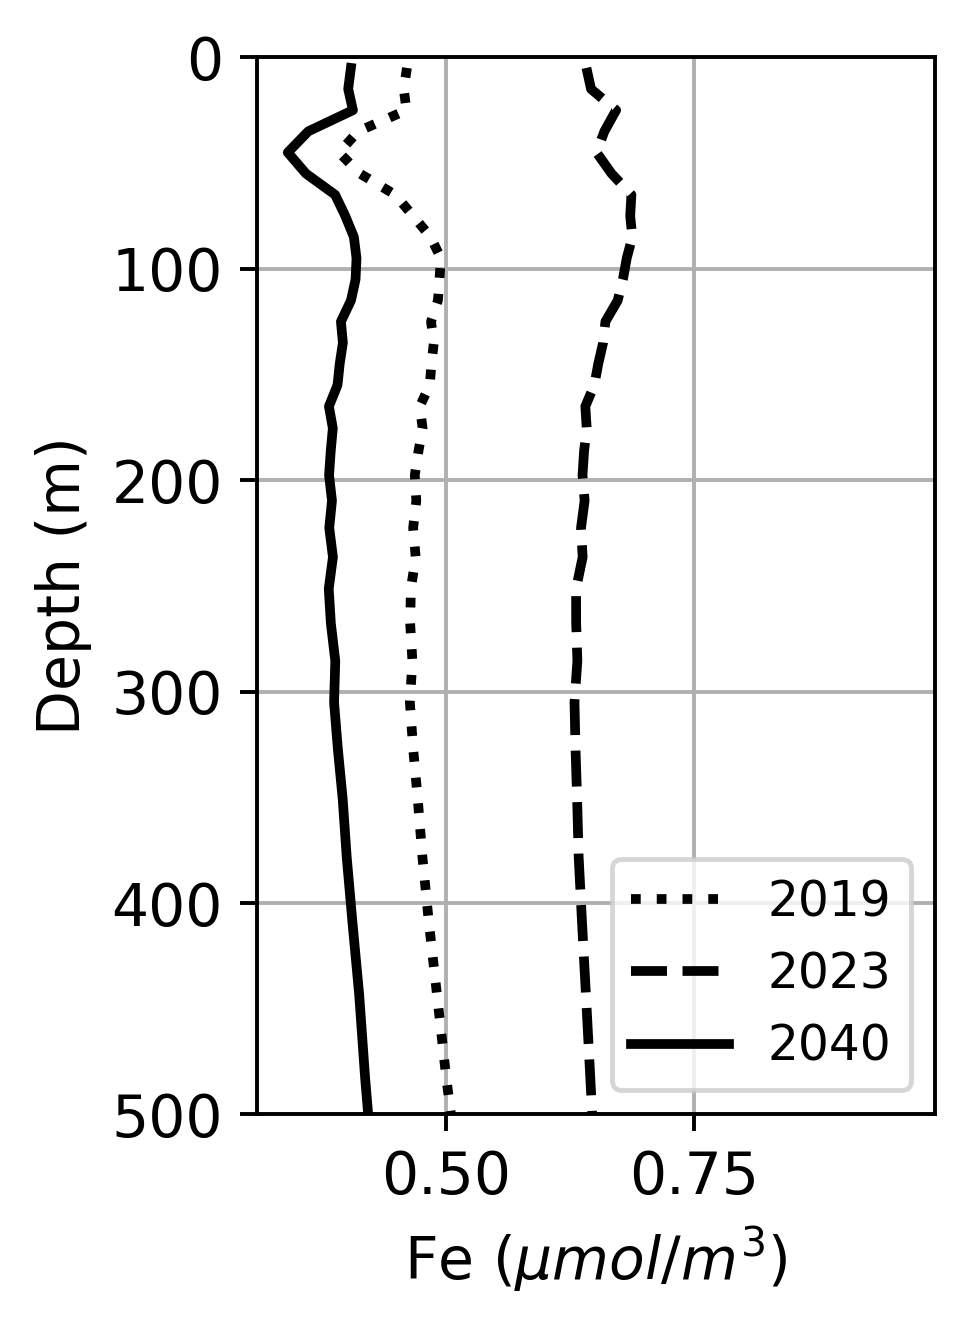

In [12]:
### Line Plot

fig= plt.figure(figsize=(2.5,4))

plt.plot(reg_yr2019_mean*1000, z_t*0.01,'k:', label = '2019')

plt.plot(reg_yr2023_UR_mean*1000, z_t*0.01,'k--', label = '2023')

#plt.plot(NATL_yr2025_UR_mean, z_t*(-1)*0.01,'g', label = '2025')

plt.plot(reg_yr2040_UR_mean*1000, z_t*0.01,'k-', label = '2040')

plt.legend( loc='lower right',fontsize = '10')
#plt.xticks(np.arange(0,20, step = 4))
#plt.ylim([-300,0])
#plt.xlim([3.5,20])
plt.gca().invert_yaxis()
plt.grid()
plt.ylim([500,0])
plt.ylabel('Depth (m)')
plt.xlabel('Fe ($\mu mol/m^3$)')
fig.savefig('/glade/work/vgarza/nw_figures/Fe scavenge Rate Depth - 350 m-no negative.jpg' , bbox_inches='tight')